In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import os
import random
from sklearn.model_selection import train_test_split

def create_img_dset(fp, label):
    dset = []
    for file in os.listdir(fp):
        curr_fp = fp + f'/{file}'
        img = cv2.imread(curr_fp)

        dset.append((img, label))
    
    return dset

b_train = create_img_dset('./b_train', 0)
b_test = create_img_dset('./b_test', 0)
v_files = create_img_dset('./v_files_preprocessed/', 1)

b_train_labels = [0 for i in range(len(b_train))]
b_test_labels = [0 for i in range(len(b_test))]

dataset = np.array(b_train + b_test + v_files[:len(b_train) + len(b_test) - 2])

X_train, X_test, y_train, y_test = train_test_split(dataset[:, 0], dataset[:, 1], test_size=0.2, random_state=42)

C:\Users\Student\AppData\Local\Temp\ipykernel_25268\1019094648.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dataset = np.array(b_train + b_test + v_files[:len(b_train) + len(b_test) - 2])


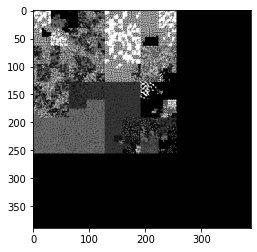

In [3]:
plt.imshow(b_train[random.randint(0, len(b_train)-1)][0])

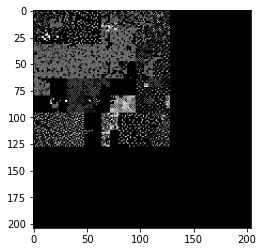

In [4]:
plt.imshow(b_test[random.randint(0, len(b_test)-1)][0])

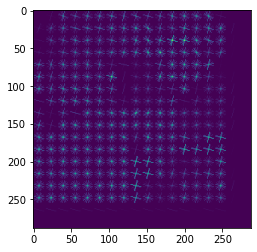

In [5]:
# Histogram of Gradients Feature Extraction
from skimage.feature import hog
from skimage import data, exposure

img = b_train[500][0]
# plt.imshow(img)

def get_hog(img: np.ndarray):
    # print(img.shape)
    fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, channel_axis=-1)

    hog_image_rescaled = exposure.rescale_intensity(hog_image) #, in_range(0, 10))

    return hog_image_rescaled 

hog_image_rescaled = get_hog(img)

plt.imshow(hog_image_rescaled)
# plt.imshow(hog_image)

In [6]:
# hog_b_train = [get_hog(img) for img in b_train]
# hog_b_test = [get_hog(img) for img in b_test]

# idx = 500
# plt.imshow(hog_b_train[idx])

(96, 199)
12288


C:\Users\Student\AppData\Local\Temp\ipykernel_25268\3776565841.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(find_min_s(np.array(b_test)[:, 0]))


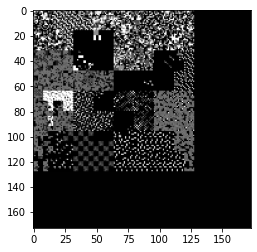

In [7]:
def find_min_s(arr: list) -> int:
    min_s = float('inf')
    min_idx = None 
    for i in range(len(arr)):
        s = arr[i].shape[0]

        if s < min_s:
            min_s = s
            min_idx = i

    return min_s, min_idx

print(find_min_s(np.array(b_test)[:, 0]))
print(np.sum((b_test[199][0] == v_files[4641][0])*1))
plt.imshow(b_test[12][0])
# plt.imshow(arr[min_idx])

(63, 63, 3)


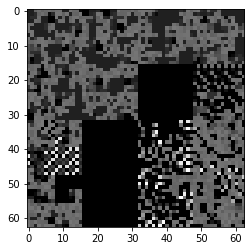

In [8]:
# def euclidean_dist(p1, p2):
#     return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# def thresh(img: np.ndarray, pt):
#     add_mat = [(0, 1), (1, 0), (1, 1), (0, -1), (-1, 0), (-1, -1), (-1, 1), (1, -1)]

#     count = 0
#     for adder in add_mat:
#         i = pt[0] + adder[0]
#         j = pt[1] + adder[1]

#         try:
#             if np.sum(img[i][j]) <= 0:
#                 count += 1
#         except IndexError:
#             pass
    
#     return count

# def cutoff_idx(arr: list) -> int:
#     max_dist = float('-inf')
#     max_coord = None
#     for i in range(len(arr)):
#         for j in range(len(arr[i])):
#             if np.sum(arr[i][j]) != 0 and thresh(img, (i, j)) >= 4:
#                 dist = euclidean_dist((0, 0), (i, j))
#                 if dist > max_dist:
#                     dist = max_dist
#                     max_coord = (i, j)

#     print(max_coord)
    
#     return max(max_coord)

def cutoff_idx(arr: list, buffer) -> int:
    arr = list(arr)
    arr.reverse()

    for i in range(len(arr)):
        if sum(arr[i]) >= buffer:
            # if count > buffer:
            return len(arr) - 1 - i

def crop_img(img: np.ndarray, buffer: int) -> np.ndarray:
    # h_idx = cutoff_idx(img[0, :], buffer)
    # v_idx = cutoff_idx(img[:, 0], buffer)

    arrs = []
    for i in range(15):
        idx = random.randint(0, len(img[0]) // 2)
        if random.randint(0, 1) == 1:
            arrs.append(img[idx, :])
        else:
            arrs.append(img[:, idx])

    idxs = []
    for arr in arrs:
        cutoff = cutoff_idx(arr, buffer)
        if cutoff != None:
            idxs.append(cutoff)

    b_idx = max(idxs)

    return img[:b_idx, :b_idx]

img = crop_img(b_test[5][0], 5)
print(img.shape)
plt.imshow(img)

In [9]:
for i in range(len(X_train)):
    X_train[i] = crop_img(X_train[i], 5)
for i in range(len(X_test)):
    X_test[i] = crop_img(X_test[i], 5)

(63, 363)
(63, 43)


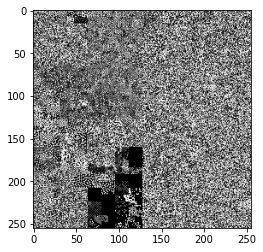

In [10]:
xtr_min = find_min_s(X_train)
xte_min = find_min_s(X_test)

print(xtr_min)
print(xte_min)

plt.imshow(X_train[93])
# plt.imshow(X_test[1079])

In [11]:
def pad_img(img: np.ndarray, des_w: int) -> np.ndarray:
    while len(img[:, 0]) < des_w:
        row = np.zeros((1, len(img[0, :]), 3))
        img = np.vstack((img, row))
    while len(img[0, :]) < des_w:
        col = np.zeros((len(img[:, 0]), 1, 3))
        img = np.column_stack((img, col))

    return img

def rescale_img_arrs(arr):
    narr = []
    for i in range(len(arr)):
        if arr[i].shape[0] < 64:
            narr.append(pad_img(arr[i], 64))
        else:
            img = cv2.resize(arr[i], (64, 64))
            narr.append(img)

    return narr

nxtrain = rescale_img_arrs(X_train)
nxtest = rescale_img_arrs(X_test)

C:\Users\Student\AppData\Local\Temp\ipykernel_25268\2469283959.py:28: RuntimeWarning: divide by zero encountered in divide
  orientation_matrix = np.divide(y_grad, x_grad)
C:\Users\Student\AppData\Local\Temp\ipykernel_25268\2469283959.py:28: RuntimeWarning: invalid value encountered in divide
  orientation_matrix = np.divide(y_grad, x_grad)


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


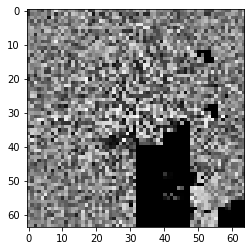

In [12]:
# HOG feature extraction
img = nxtrain[2]
plt.imshow(img)

x_grad_kernel = np.array([[ 0, 0, 0],
                          [-1, 0, 1],
                          [ 0, 0, 0]])

y_grad_kernel = np.array([[0, -1, 0],
                          [0,  0, 0],
                          [0,  1, 0]])

x_grad_kernel = np.array([[ 1, 0, 1],
                          [-2, 0, 2],
                          [ 1, 0, 1]])

y_grad_kernel = np.array([[1, -2, 1],
                          [0,  0, 0],
                          [1,  2, 1]])

def convolve_img(img: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    return cv2.filter2D(img, -1, kernel)

def gradient_magnitude(x_grad: np.ndarray, y_grad: np.ndarray):
    return np.sqrt(x_grad**2 + y_grad**2)

def gradient_orientation(x_grad: np.ndarray, y_grad: np.ndarray):
    orientation_matrix = np.divide(y_grad, x_grad)
    orientation_matrix[np.isnan(orientation_matrix)] = 0

    return np.arctan(orientation_matrix)#  * (180 / np.pi)

def find_closest_bin(val: int, bins: list) -> tuple:
    val = np.sum(val)//3

    print(val)

    for i in range(len(bins)):
        if val == bins[i]:
            return bins[i]

    x1 = 0
    x2 = 20

    for i in range(len(bins)):
        if val > x1 and val < x2:
            return (x1, x2)

        x1 += 20
        x2 += 20

    # min_dist = float('inf')
    # closest_bin = None
    # for i in range(len(bins)):
    #     dist = abs(val - np.sum(bins[i])//3)

    #     if dist < min_dist:
    #         closest_bin = bins[i]
    #         dist = min_dist

    # if val > closest_bin:
    #     return (closest_bin, closest_bin + 20)
    # elif val < closest_bin:
    #     return (closest_bin - 20, closest_bin)
    # elif val == closest_bin:
    #     return closest_bin

def bin_creation(mag_mat: np.ndarray, or_mat: np.ndarray) -> dict:
    bins = [i for i in range(0, 180, 20)]
    histogram = {}

    for bin in bins:
        histogram.update({bin: []})

    for i in range(len(mag_mat)):
        for j in range(len(mag_mat[i])):
            magnitude = np.sum(mag_mat[i][j])//3
            direction = np.sum(or_mat[i][j])//3

            # print(direction)

            closest_bin = find_closest_bin(direction, bins)

            if type(closest_bin) == tuple:
                lbound = closest_bin[0]
                ubound = closest_bin[1]

                udiff = ubound - direction
                ldiff = direction - lbound

                histogram[lbound].append((udiff/lbound)*magnitude)
                histogram[ubound].append((ldiff/lbound)*magnitude)
            elif type(closest_bin) == int:
                histogram[closest_bin].append(magnitude)
    
    return histogram

def extract_HOG_features(img: np.ndarray):
    x_grad, y_grad = convolve_img(img, x_grad_kernel), convolve_img(img, y_grad_kernel)
    magnitude_matrix = gradient_magnitude(x_grad, y_grad)
    orientation_matrix = gradient_orientation(x_grad, y_grad)

    histogram = bin_creation(magnitude_matrix, orientation_matrix)
    
    return histogram

histogram = extract_HOG_features(img)
print(histogram)

In [18]:
# CNN because i dont wanna deal wtih HOG stuff rn
# nxtrain, nxtest, y_train, y_test

import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 64, 5)
        # self.conv1 = nn.Conv2d(1, 64, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(64, 128, 5)
        self.l1 = nn.Linear(21632, 128)
        self.dropout = nn.Dropout(p=0.2)
        # self.l1 = nn.Linear(128 * 5 * 5, 128)
        self.l2 = nn.Linear(128, 64)
        self.out = nn.Linear(64, 1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)

        x = F.relu(self.conv2(x))
        x = self.pool(x)

        x = torch.flatten(x)

        x = F.relu(self.l1(x))
        x = self.dropout(x)
        x = F.relu(self.l2(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.out(x))

        return x

In [20]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

model = CNN()

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)# , momentum=0.9)

losses = []

for epoch in range(100):
    closs = 0
    for i  in range(len(nxtrain)):
        # print(nxtrain[epoch].shape)
        inp = nxtrain[i][:, :, 0]# , get_hog(nxtrain[i])]

        # for _ in inp:
        #     print(_.shape)
        # print(nxtrain[epoch][:, :, 2].shape)

        X = torch.Tensor([inp])# nxtrain[epoch])
        y = torch.Tensor([y_train[i]])

        preds = model(X)

        loss = criterion(preds, y)

        closs += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    losses.append(closs/len(nxtrain))
    print(f"[ Epoch {epoch} Loss {losses[-1]} ]")

[ Epoch 0 Loss 1.0082566122470773 ]
[ Epoch 1 Loss 0.4960472490931718 ]
[ Epoch 2 Loss 0.4371980212336087 ]
[ Epoch 3 Loss 0.39059770141785066 ]
[ Epoch 4 Loss 0.3540624932785404 ]
[ Epoch 5 Loss 0.29438598706372704 ]
[ Epoch 6 Loss 0.27604034184084686 ]
[ Epoch 7 Loss 0.21891886367395513 ]
[ Epoch 8 Loss 0.21321471311088416 ]
[ Epoch 9 Loss 0.19348394831964866 ]
[ Epoch 10 Loss 0.18875251758373127 ]
[ Epoch 11 Loss 0.172790590816394 ]
[ Epoch 12 Loss 0.15889872154830634 ]
[ Epoch 13 Loss 0.14622568671790726 ]
[ Epoch 14 Loss 0.14305928393472467 ]
[ Epoch 15 Loss 0.13282143220335357 ]
[ Epoch 16 Loss 0.14192794749621998 ]
[ Epoch 17 Loss 0.11933801099262262 ]
[ Epoch 18 Loss 0.1321992146150548 ]
[ Epoch 19 Loss 0.11548984090085065 ]
[ Epoch 20 Loss 0.11284397432195922 ]
[ Epoch 21 Loss 0.10661322742200141 ]
[ Epoch 22 Loss 0.09503109044184294 ]
[ Epoch 23 Loss 0.10599388379738534 ]
[ Epoch 24 Loss 0.08719824243646504 ]
[ Epoch 25 Loss 0.09802043492682723 ]
[ Epoch 26 Loss 0.09408450075

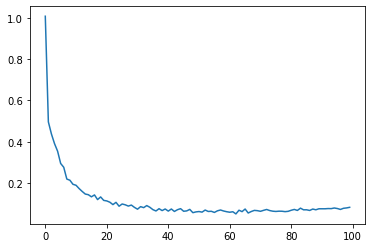

In [21]:
plt.plot(losses)

In [24]:
right = 0

y_actu = y_test
y_pred = []

for i in range(len(nxtest)):
    arr = nxtest[i]

    arr = [arr[:, :, 0]]

    pred = model(torch.Tensor(arr))

    if pred > 0.5:
        pred = 1
    else:
        pred = 0

    y_pred.append(pred)

    if pred == y_test[i]:
        right += 1

print(f"Accuracy: {round(right/len(nxtest)*100, 2)}%")

Accuracy: 84.0%


In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

y_acc = y_actu.astype(np.uint8)
y_pred = np.array(y_pred).astype(np.uint8)

cmat = confusion_matrix(y_acc, y_pred)
print(cmat)
print(accuracy_score(y_acc, y_pred))

[[168  39]
 [ 25 168]]
0.84


Accuracy: 83.25%
Sensitivity/Recall: 0.8705
Specificity/Precision: 0.8116
F1 Score: 0.84
AUC Score: 0.8887


[Text(0.5, 1.0, '\nCNN Confusion Matrix\n')]

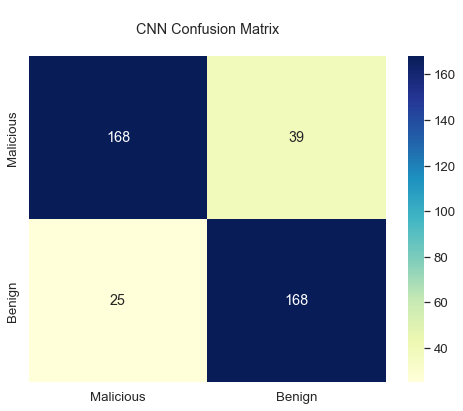

In [28]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import roc_auc_score 

inline_rc = dict(mpl.rcParams)

df_cm = pd.DataFrame(cmat, index=["Malicious", "Benign"], columns = ["Malicious", "Benign"])

# plt.figure()
# plt.imshow(cmat, interpolation='nearest', cmap=plt.cm.Blues)
# tick_marks = np.arange(2)
# classNames = ["Malicious", "Benign"]

# # thresh = confusion_matrix.max() / 2.
# for i in range(cmat.shape[0]):
#     for j in range(cmat.shape[1]):
#         plt.text(j, i, format(cmat[i, j]), 
#         ha='center', va='center', 
#         color='white' if cmat[i, j] > 100 else "black")

# plt.tight_layout()
# plt.colorbar()
# plt.show()
plt.figure(figsize=(8, 6))
# sn.heatmap(df_cm, annot=True, cmap='YlGnBu')# , cmap="blue")
sn.set(font_scale=1.2)
# sn.set(font="Verdana")

y_pred = []

for i in range(len(nxtest)):
    arr = nxtest[i]

    arr = [arr[:, :, 0]]

    pred = model(torch.Tensor(arr))

    pred = pred.cpu().detach().numpy()[0]

    y_pred.append(pred)

y_b_pred = (np.array(y_pred) > 0.5)*1

TP = cmat[0, 0]
FP = cmat[0, 1]
FN = cmat[1, 0]
TN = cmat[1, 1]

# what proportion of positive class was correclty classified
recall = TP/(TP+FN)
# what proportion of negative class was correctly classified
precision = TN/(TN+FP)

f1_score = 2*(precision*recall)/(precision+recall) 

auc = roc_auc_score(y_test.astype(np.uint8), y_pred)

print(f"Accuracy: {accuracy_score(y_acc, y_b_pred) * 100}%")
print(f"Sensitivity/Recall: {round(recall, 4)}")
print(f"Specificity/Precision: {round(precision, 4)}")
print(f"F1 Score: {round(f1_score, 4)}")
print(f"AUC Score: {round(auc, 4)}")

sn.heatmap(df_cm, annot=True, cmap='YlGnBu', fmt='d').set(title='\nCNN Confusion Matrix\n')

Text(0, 0.5, 'True Positive Rate')

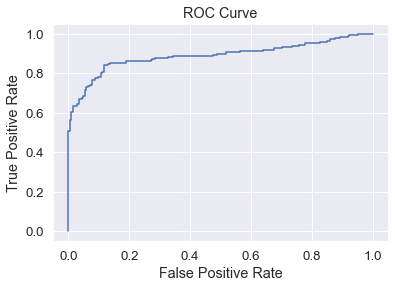

In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score 

fpr, tpr, thresholds = roc_curve(y_test.astype(np.uint8), y_pred) 

plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [13]:
import torch

pred = torch.Tensor([-10])
torch.nn.functional.softmax(pred)

C:\Users\Student\AppData\Local\Temp\ipykernel_17688\3774542349.py:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  torch.nn.functional.softmax(pred)


tensor([1.])

(array([793., 805.]),
 array([0.0, 0.5, 1.0], dtype=object),
 <BarContainer object of 2 artists>)

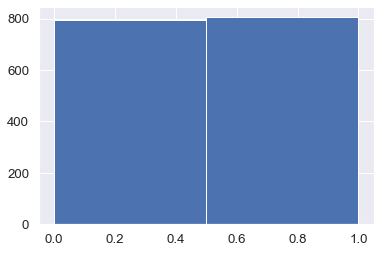

In [ ]:
plt.hist(y_train, bins=2)

(array([207., 193.]),
 array([0.0, 0.5, 1.0], dtype=object),
 <BarContainer object of 2 artists>)

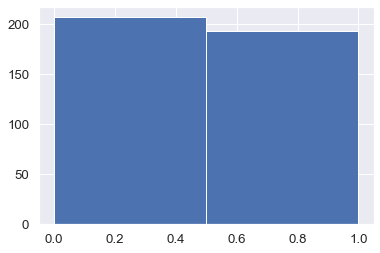

In [ ]:
plt.hist(y_test, bins=2)

In [ ]:
torch.save(model.state_dict(), './model_single_channel_CNN')

In [210]:
arr = np.array([
    [[1, 2, 4], [1, 2, 3], [4, 3, 5]],
    [[1, 2, 4], [1, 2, 3], [4, 3, 5]],
    [[1, 2, 4], [1, 2, 3], [4, 3, 5]]
])

print([arr[:, :, 0], arr[:, :, 1], arr[:, :, 2]])
print(arr[:, :, 0])

[array([[1, 1, 4],
       [1, 1, 4],
       [1, 1, 4]]), array([[2, 2, 3],
       [2, 2, 3],
       [2, 2, 3]]), array([[4, 3, 5],
       [4, 3, 5],
       [4, 3, 5]])]
[[1 1 4]
 [1 1 4]
 [1 1 4]]


In [114]:
mat = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])

np.arctan(np.divide(mat, 2*mat))

array([[0.46364761, 0.46364761, 0.46364761],
       [0.46364761, 0.46364761, 0.46364761],
       [0.46364761, 0.46364761, 0.46364761]])

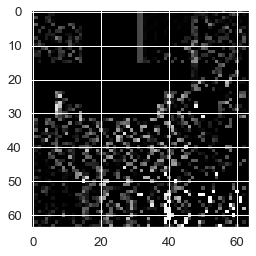

In [585]:
plt.imshow(x_grad)

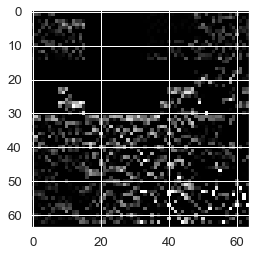

In [586]:
plt.imshow(y_grad)

In [52]:
arr = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])

arr = np.column_stack((arr, [1, 2, 3]))
np.vstack((arr, [1, 2, 3, 4]))

array([[1, 2, 3, 1],
       [4, 5, 6, 2],
       [7, 8, 9, 3],
       [1, 2, 3, 4]])

In [48]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class AlexNet()

SyntaxError: expected ':' (4158991503.py, line 5)

[[  0   0   1 ...   0   0   0]
 [  0   0   1 ...   0   0   0]
 [  0   0   1 ...   0   0   0]
 ...
 [127 255 255 ...   0   0   0]
 [127 255 124 ...   0   0   0]
 [127 255  24 ...   0   0   0]]


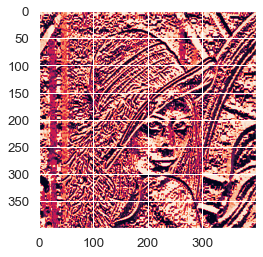

In [35]:
from skimage.feature import local_binary_pattern
import cv2

img = cv2.imread('./hat_woman_LBP.jpg', 0)

radius = 3
num_points= 8 * radius

lbp = local_binary_pattern(img, num_points, radius).astype(np.uint8)

plt.imshow(lbp)